# Statsmodel formula

# import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import statsmodels.api as sm


# load data

In [3]:
open_path = os.path.join(os.getcwd(), 'data', 'Guerry.csv')
df_raw = pd.read_csv(open_path)
df_raw

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,86,W,Vienne,15010,4710,25,8922,35224,21851,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,83,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,84,88,E,Vosges,18835,9044,62,4040,14978,33029,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,85,89,C,Yonne,18006,6516,47,4276,16616,12789,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [4]:
df_raw.columns

Index(['Unnamed: 0', 'dept', 'Region', 'Department', 'Crime_pers',
       'Crime_prop', 'Literacy', 'Donations', 'Infants', 'Suicides',
       'MainCity', 'Wealth', 'Commerce', 'Clergy', 'Crime_parents',
       'Infanticide', 'Donation_clergy', 'Lottery', 'Desertion', 'Instruction',
       'Prostitutes', 'Distance', 'Area', 'Pop1831'],
      dtype='object')

In [5]:
df = df_raw[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E
...,...,...,...,...
80,68,28,56,W
81,40,25,68,W
82,55,13,67,C
83,14,62,82,E


# simulation

In [6]:
def generate_habitants_data(n=300, seed=42):
    np.random.seed(seed)

    villes = ['toulouse', 'lyon', 'paris', 'montpelier', 'neuilly']
    df = pd.DataFrame()
    df['ville'] = np.random.choice(villes, size=n)

    # Mappings pour effets simulés
    bolas_base = {
        'neuilly': 20,
        'paris': 35,
        'lyon': 50,
        'montpelier': 65,
        'toulouse': 80
    }

    classe_base = {
        'neuilly': 80,
        'paris': 70,
        'montpelier': 60,
        'toulouse': 50,
        'lyon': 90
    }

    coquetterie_base = {
        'neuilly': 90,
        'paris': 75,
        'lyon': 60,
        'montpelier': 45,
        'toulouse': 30
    }

    # Génération des variables avec effets
    df['niveau_bolas'] = df['ville'].apply(lambda v: bolas_base[v] + np.random.normal(0, 10))
    df['niveau_bolas'] = df['niveau_bolas'].clip(0, 100)

    df['appetance_kro'] = df['niveau_bolas'] + np.random.normal(0, 10, size=n)
    df['appetance_kro'] = df['appetance_kro'].clip(0, 100)

    df['niveau_classe'] = df['ville'].apply(lambda v: classe_base[v] + np.random.normal(0, 10))
    df['niveau_classe'] = df['niveau_classe'].clip(0, 100)

    df['niveau_coquetterie'] = df['ville'].apply(lambda v: coquetterie_base[v] + np.random.normal(0, 10))
    df['niveau_coquetterie'] = df['niveau_coquetterie'].clip(0, 100)

    # Nouvel effet de ville
    ville_base_code = {
        'neuilly': 10,
        'paris': 20,
        'lyon': 30,
        'montpelier': 40,
        'toulouse': 50
    }

    df['niveau_code'] = df.apply(
        lambda row: (
            0.5 * row['niveau_classe'] -                # corrélation positive
            0.4 * row['niveau_coquetterie'] +           # corrélation négative
            ville_base_code[row['ville']] +             # effet de la ville
            np.random.normal(0, 5)                      # bruit
        ),
        axis=1
    )

    df['niveau_code'] = df['niveau_code'].clip(0, 100)

    return df


# Exemple d'utilisation
df_code = generate_habitants_data()
df_code


,ville,niveau_bolas,appetance_kro,niveau_classe,niveau_coquetterie,niveau_code
0,montpelier,63.723952,55.011483,56.896544,39.835511,52.422323
1,neuilly,23.415908,21.148414,81.156848,90.442439,20.960368
2,paris,56.188862,48.477997,57.490037,62.626584,18.950776
3,neuilly,35.465368,41.227114,100.000000,96.292490,10.673777
4,neuilly,10.504810,22.400807,72.670599,91.909378,11.403834
...,...,...,...,...,...,...
295,neuilly,21.274344,21.387829,81.777559,91.666528,16.329535
296,neuilly,28.668491,31.338994,75.322872,93.251768,12.597525
297,paris,39.710368,47.054896,87.911438,73.332760,28.552978
298,montpelier,61.417908,58.584755,61.739080,53.089292,59.353208


In [28]:
df_code.to_excel('df_classecoquetterie.xlsx', index=False)

# Formules à la sauce R = Wilkinson Notation


Voir **pasty** https://patsy.readthedocs.io/en/latest/formulas.html

In [7]:
import statsmodels.formula.api as smf

##avec un ~ pour definir qui en fonction de qui
my_formula = "Lottery ~ Literacy"


### on definit la regression : ols = Ordinary Least Square pour optimiser la regression linaire
### (c'est le modele de regression dans R également)
mod = smf.ols(formula=my_formula, data=df)

### on estime (fit) le model
res_ols = mod.fit()
print (res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           0.000312
Time:                        08:57:08   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

<Axes: xlabel='Lottery', ylabel='Literacy'>

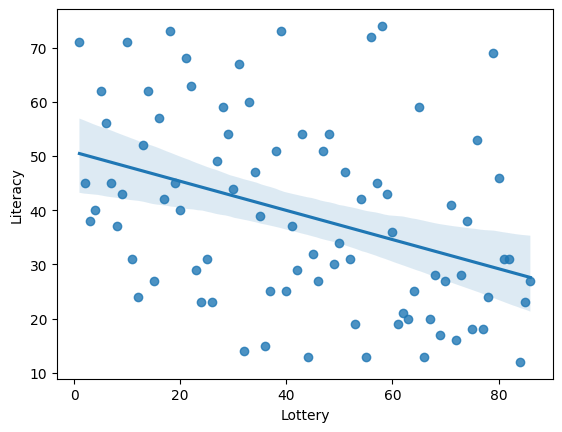

In [8]:
sns.regplot(data=df, x="Lottery", y="Literacy")

In [9]:
##pour definir un modele avec plusieurs variables, on utilise le '+'
my_full_formula = "Lottery ~ Literacy + Wealth"

full_mod = smf.ols(formula=my_full_formula, data=df)

### on estime (fit) le model
full_res_ols = full_mod.fit()
print (full_res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           2.66e-07
Time:                        08:58:00   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

In [10]:
##pour definir un modele avec plusieurs variables, on utilise le '+'
my_full_formula = "Lottery ~ Literacy * Wealth"

full_mod = smf.ols(formula=my_full_formula, data=df)

### on estime (fit) le model
full_res_ols = full_mod.fit()
print (full_res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.32e-06
Time:                        08:58:28   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

Rq: on peut aussi specifier TOUTES les interactions que l'on veut tester en mettant
my_formula = "Lottery ~ Literacy + Region + Literacy:Region + Wealth +  Wealth:Region + Literacy:Wealth + Literacy:Wealth:Region"

ceci revient au meme que 'Literacy * Wealth * Region'

### ANOVA simple

In [ ]:
anova_model = smf.ols("Lottery ~ Region", data=df).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)
print(anova_results)

                sum_sq    df         F    PR(>F)
Region     7307.011765   4.0  3.312945  0.014534
Residual  44111.882353  80.0       NaN       NaN



Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C      E -18.7059 0.1485  -41.185  3.7732  False
     C      N -25.7647 0.0165 -48.2438 -3.2856   True
     C      S  -5.7647 0.9523 -28.2438 16.7144  False
     C      W  -8.4118 0.8339 -30.8908 14.0673  False
     E      N  -7.0588 0.9047 -29.5379 15.4202  False
     E      S  12.9412 0.4976  -9.5379 35.4202  False
     E      W  10.2941 0.7053  -12.185 32.7732  False
     N      S     20.0 0.1048  -2.4791 42.4791  False
     N      W  17.3529 0.2078  -5.1261  39.832  False
     S      W  -2.6471 0.9974 -25.1261  19.832  False
-----------------------------------------------------


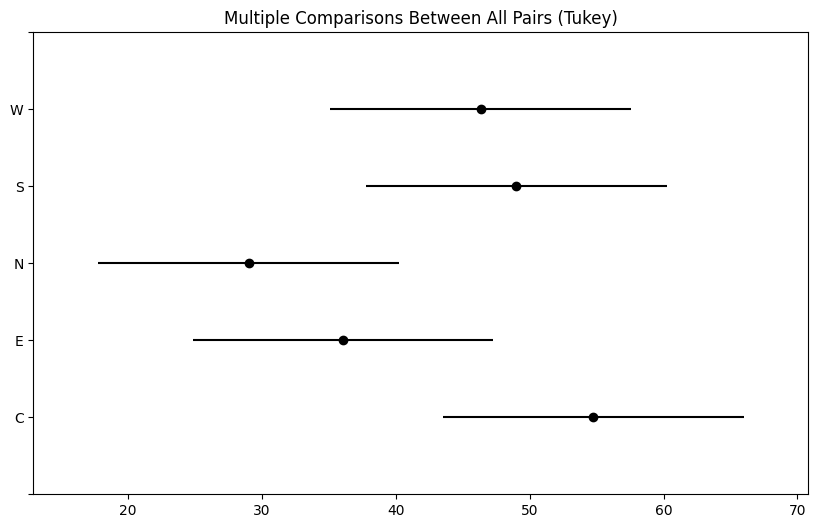

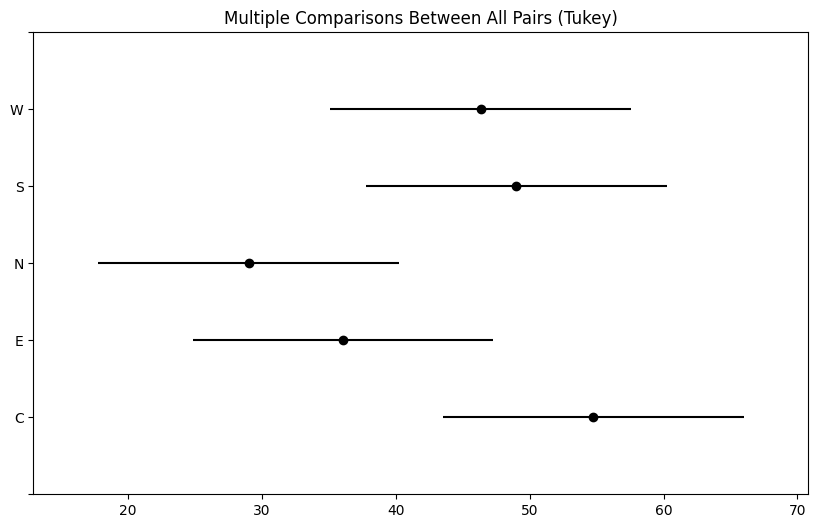

In [17]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df["Lottery"], groups=df["Region"], alpha=0.05)
print("\nTukey HSD Results:")
print(tukey)

tukey.plot_simultaneous()

# LMM (linear mixed model)

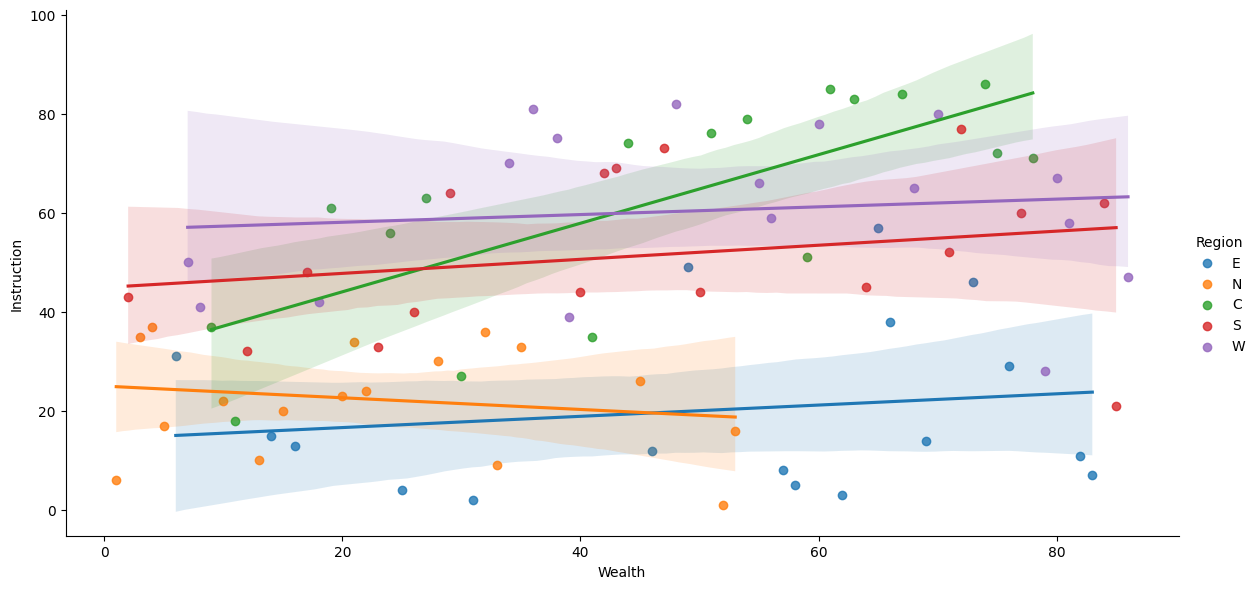

In [20]:
sns.lmplot(data=df_raw, x="Wealth", y="Instruction", hue="Region", aspect=2, height=6, logistic=False)


In [18]:
df_raw = df_raw.dropna()
# Syntaxe pour un modèle à effets mixtes avec effet aléatoire sur 'Region'
mixed_mod = smf.mixedlm("Instruction ~ Wealth", data=df_raw, groups=df["Region"])
mixed_res = mixed_mod.fit()
print(mixed_res.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Instruction
No. Observations: 85      Method:             REML       
No. Groups:       5       Scale:              271.3473   
Min. group size:  17      Log-Likelihood:     -364.2459  
Max. group size:  17      Converged:          Yes        
Mean group size:  17.0                                   
----------------------------------------------------------
            Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept   34.451     9.420  3.657  0.000  15.988  52.915
Wealth       0.204     0.079  2.594  0.009   0.050   0.358
Group Var  369.023    16.957                              



# Exercice

Etude sur la différence entre la classe et la coquetterie ?